CREDIT CARD FRAUD DETECTION

this data analysis is done by Sakshi K More

importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

loading the required credit card fraud dataset

In [2]:
data=pd.read_csv('card_transdata.csv')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


displaying the shape of the dataset

In [4]:
data.shape

(1000000, 8)

displaying the columns of the dataset

In [5]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

distance_from_home-the distance from home where the transaction happened.

distance_from_last_transaction-the distance from last transaction happened.

ratio_to_median_purchase_price-Ratio of purchased price transaction to median purchase price.

repeat_retailer-Is the transaction happened from same retailer.

used_chip-Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

displaying the data types of the columns

In [6]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

checking if the data contains any duplicated values

In [7]:
data.duplicated().sum()

0

checking if the adta contains any null value

In [8]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

dropping out the null values

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

craating a new column that categorically represents whether the transaction is fraud or no

In [11]:
data.loc[data['fraud']==0,'fraud_label']='Not Fraud'

In [12]:
data.loc[data['fraud']==1,'fraud_label']='Fraud'

In [13]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,fraud_label
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,Not Fraud
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,Not Fraud
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,Not Fraud
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,Not Fraud
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,Not Fraud


getting the description of the data

In [14]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


creating a countplot for the count of the fraud and not fraud data in the dataset

In [15]:
data['fraud_label'].value_counts()

Not Fraud    912597
Fraud         87403
Name: fraud_label, dtype: int64

Text(0.5, 1.0, 'Classification of Fraud and Regular Data')

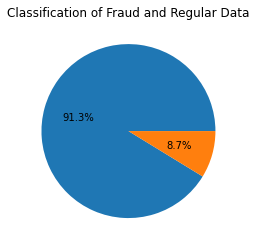

In [16]:
plt.pie(data['fraud'].value_counts(),autopct='%1.1f%%')
plt.title('Classification of Fraud and Regular Data')


Text(0.5, 1.0, 'Relationship between Fraud and Online Order')

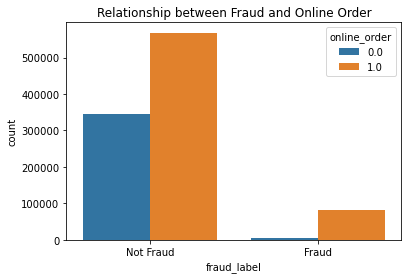

In [17]:
ax=sns.countplot(x='fraud_label',data=data,hue='online_order')
plt.title('Relationship between Fraud and Online Order')

Text(0.5, 1.0, 'Relationship between Fraud and usage of PinNumber')

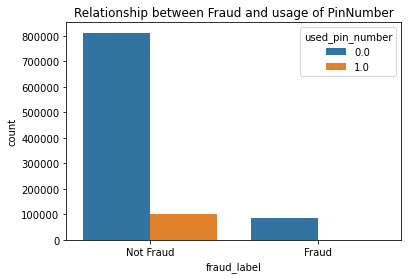

In [18]:
ax=sns.countplot(x='fraud_label',data=data,hue='used_pin_number')
plt.title('Relationship between Fraud and usage of PinNumber')

Text(0.5, 1.0, 'Relationship between Fraud and usage of Credit Card')

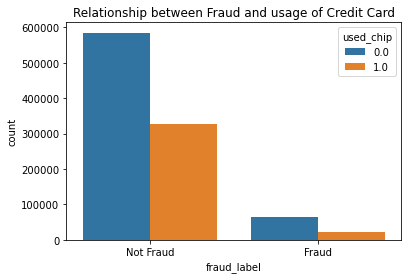

In [19]:
ax=sns.countplot(x='fraud_label',data=data,hue='used_chip')
plt.title('Relationship between Fraud and usage of Credit Card')

Text(0.5, 1.0, 'Relationship between Fraud and Retailer')

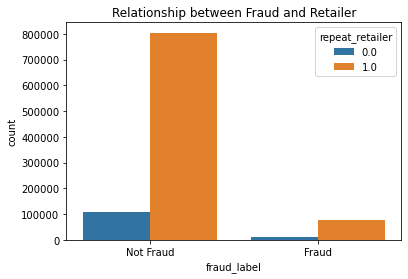

In [20]:
ax=sns.countplot(x='fraud_label',data=data,hue='repeat_retailer')
plt.title('Relationship between Fraud and Retailer')

classifying data into 2 sets i.e fraud and not fraud

In [21]:
fraud_data=data[data['fraud']==1]

In [22]:
regular_data=data[data['fraud']==0]

getting description of both the data for better analysis

In [23]:
fraud_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [24]:
regular_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


MODEL CREATION

classifying data into training and testing set

In [25]:
x=data[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']]

In [26]:
y=data['fraud']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
prediction1=lr.predict(x_test)

In [31]:
acc_score_lr=accuracy_score(y_test,prediction1)

In [32]:
print('The accuracy score of Logistic Regression Model is : ',acc_score_lr)

The accuracy score of Logistic Regression Model is :  0.95575


In [33]:
dtc=DecisionTreeClassifier()

In [34]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
prediction2=dtc.predict(x_test)

In [36]:
acc_score_dtc=accuracy_score(y_test,prediction2)

In [37]:
print('The accuracy score of Decison Tree Classifier Model is : ',acc_score_dtc)

The accuracy score of Decison Tree Classifier Model is :  0.999995


In [38]:
data.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,fraud_label
0,57.877857,0.31114,1.94594,1.0,1.0,0.0,0.0,0.0,Not Fraud


from this above models we can predict that the Decision Tree Model fits best for this data